# Shallow Neuron Network (One hidden layer): Planar Donut Data Classification


**1 - Packages**

In [1]:
#1.  Lets first import all the necessary packages
!pip install mlxtend  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### **Dataset**

In [2]:
#2. Loading dataset
X, Y = sklearn.datasets.make_circles(n_samples=400, shuffle=True, noise=0.125, random_state=None, factor=0.5)
X = X.T;
Y = np.reshape(Y, (-1, 1)).T;
print(X.shape)
print(Y.shape)


(2, 400)
(1, 400)


**Make a large circle containing a smaller circle in 2d.**

X array of shape [n_samples, 2] <BR>
The generated samples.

y array of shape [n_samples] <BR>
The integer labels (0 or 1) for class membership of each sample.

### **Visualizing the dataset**

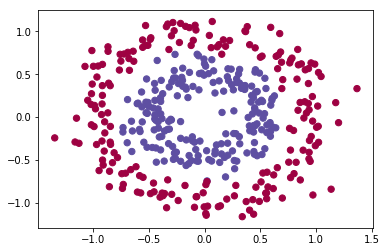

In [3]:
#Visualizing the dataset using matplotlib
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

The dataset looks like a donut shape (cocentric circles). <br> 
Our goal is to make a model to fit the dataset

We have a numpy-array (matrix) X that contains our features (x1, x2) and a numpy-array (vector) Y that contains our labels (red:0, blue:1).

**exploring dataset**

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


### **Simple Logistic Regression** 


Before building a full neural network, I have applied logistic regression to check, how it works on our data.


In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


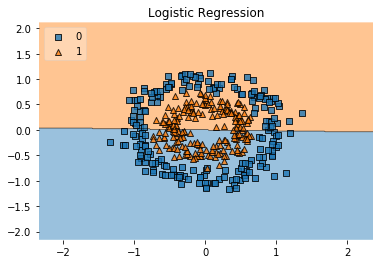

In [6]:
# Ploting the decision boundary for logistic regression
plot_decision_regions(X.T, Y.T.ravel(), clf=clf,  legend=2)
plt.title("Logistic Regression")
plt.show();

# Print accuracy
LR_predictions = clf.predict(X.T)

In [7]:
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 49 % (percentage of correctly labelled datapoints)


**Interpretation:** The dataset is not linearly separable. Therefore, logistic regression doesn't perform well on the dataset. 
<BR>


## <BR> **Applying Neural Network model on the dataset.**

##### Starting with Neural Networks...

**4.1 - Defining the neural network structure** <BR>
We started with defining three variables:  <BR>-n_x: the size of the input layer <Br>- n_h: the size of the hidden layer (set this to 4)<BR> - n_y: the size of the output layer


In [8]:
def layer_sizes(X, Y):
     # X -- input dataset of shape (input size, number of examples)
    # Y -- labels of shape (output size, number of examples)
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

**4.2 - Initialize the model's parameters**

1.initialize the weights matrices with random values. <BR>
Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b). <BR>
2. will initialize the bias vectors as zeros.<BR>
Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [11]:
#initialize_parameters:initializing the weights matrices with random values.

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that our output although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**4.3 - The Loop** <BR>
Implement forward_propagation().

In [14]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))

    return s

In [15]:
#  forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 =  np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

**Implement compute_cost() to compute the value of the cost  J .**


In [18]:
# compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) +  np.multiply(np.log(1-A2), (1-Y))
    cost = -1/m*np.sum(logprobs)
   
    cost = np.squeeze(cost)     
    assert(isinstance(cost, float))
    
    return cost

**Implement the function backward_propagation().**


In [21]:
#  backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
  
    A1 = cache["A1"]
    A2 =  cache["A2"]

    dZ2= A2-Y
    dW2 = 1./m*np.dot(dZ2, A1.T)
    db2 = 1./m*np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1./m* np.dot(dZ1, X.T)
    db1 = 1./m*np.sum(dZ1, axis = 1, keepdims=True)
      
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

**Implement the update rule.** <BR>
    
 Use gradient descent. We have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

General gradient descent rule:  θ=θ−α∂J∂θ  where  α  is the learning rate and  θ  represents a parameter.

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [24]:
# update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
       
    # Update rule for each parameter
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [25]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00627707 -0.00063607 -0.01917302  0.01387401 -0.01542489]
 [-0.00879198  0.00501482 -0.01206191 -0.01103109 -0.00864219]
 [ 0.00612691  0.02294348 -0.00022762 -0.01044017  0.00465513]
 [-0.00832883 -0.000274    0.01422653 -0.01033045  0.00292455]]
b1 = [[ 3.95550704e-06]
 [ 4.82737357e-07]
 [ 5.54009632e-07]
 [-2.39810108e-07]]
W2 = [[ 0.00542457 -0.0008663  -0.00079444 -0.01644457]]
b2 = [[2.08034842e-05]]


**4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()** <BR>
Building our neural network model in nn_model().

In [26]:

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
      # Loop (gradient descent)

    for i in range(0, num_iterations):
         
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

**4.5 Predictions**
Reminder: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5
0 & \text{otherwise} \end{cases}$

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [30]:

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
  
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

**It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of  nh  hidden units.**

Cost after iteration 0: 0.693150
Cost after iteration 1000: 0.661550
Cost after iteration 2000: 0.083618
Cost after iteration 3000: 0.058921
Cost after iteration 4000: 0.050377
Cost after iteration 5000: 0.046339
Cost after iteration 6000: 0.044378
Cost after iteration 7000: 0.041862
Cost after iteration 8000: 0.041627
Cost after iteration 9000: 0.045170


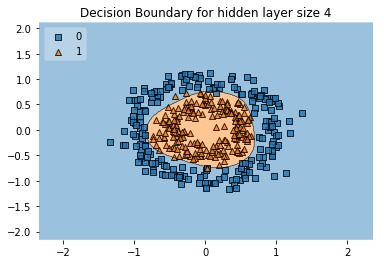

In [33]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

class clf(object):
    @staticmethod
    def predict(x):
        global predict
        return predict(parameters, x.T)

# Plot the decision boundary
plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show();

In [34]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 99%



**Accuracy is really high compared to Logistic Regression. The model has learnt the donut patern!** <BR><BR>**Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.**

Now, let's try out several hidden layer sizes.

**Tuning hidden layer size**

Accuracy for 1 hidden units: 64.0 %
Accuracy for 2 hidden units: 78.25 %
Accuracy for 3 hidden units: 99.0 %
Accuracy for 4 hidden units: 99.0 %
Accuracy for 5 hidden units: 98.5 %
Accuracy for 20 hidden units: 98.25 %
Accuracy for 50 hidden units: 99.5 %


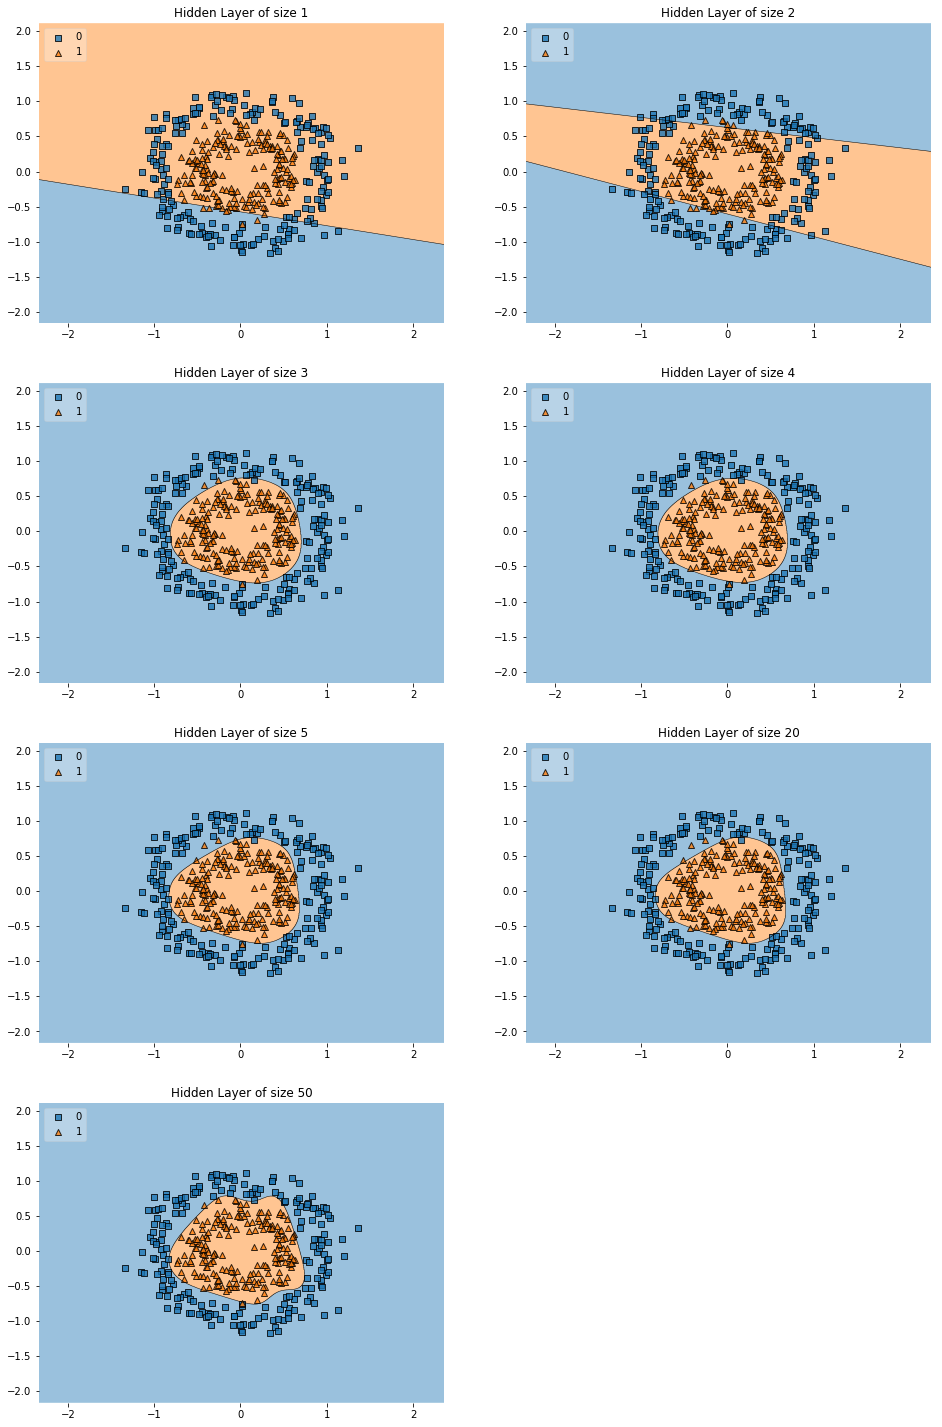

In [35]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation:**
<BR>
1. The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. <BR>
2.The best hidden layer size seems to be around n_h = 4. Indeed, a value around here seems to fits the data well without also incurring noticable overfitting. <BR>